Import all packages

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy import signal

Define and plot the given spectral density function

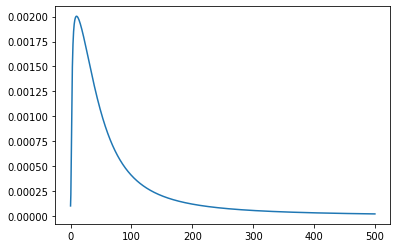

In [199]:
alpha = 5
wg = 10
kesi = 0.25

def Sx(w,alpha,wg,kesi):
    return (1 + alpha*w*w)/((wg*wg - w*w)**2 + (2*kesi*w*wg*wg)**2)    # Define spectral density function

w_sample = np.linspace(0,500,1000)                                     # Visualize spectral density function
Sx_sample = Sx(w_sample,alpha,wg,kesi)

plt.plot(w_sample,Sx_sample)
plt.show()

Determine upper cut-off frequency wu

In [200]:
epsilo = 0.05

integrate_target = integrate.quad(lambda w: Sx(w,alpha,wg,kesi), 0, np.inf)[0] * (1-epsilo)

upper_frequency = 100
while upper_frequency < 10000:
    if (integrate.quad(lambda w: Sx(w,alpha,wg,kesi), 0, upper_frequency)[0] < integrate_target):
        upper_frequency = upper_frequency + 0.01
    else:
        break

print('Upper cut-off frequency wu = ',upper_frequency,'rad/s')

Upper cut-off frequency wu =  634.149999999554 rad/s


Define parameters

In [202]:
upper_frequency = 635                                             # Re-define upper cut-off frequency based on last step result
N = 500
delt_w = upper_frequency/N
T_0 = 2*np.pi/delt_w
delt_t = 0.0009                                                   # delt_t < 2pi/2wu
N1 = int(T_0/delt_t)

print('Upper frequency =', upper_frequency,'\n','Number of frequency points N =',N)
print('Frequency inteval delta w =',delt_w,'\n','Minimal period T0 =',T_0,)
print('Time interval delta t =',delt_t,'\n','Number of time points N1 =',N1)

Upper frequency = 635 
 Number of frequency points N = 500
Frequency inteval delta w = 1.27 
 Minimal period T0 = 4.947390005653218
Time interval delta t = 0.0009 
 Number of time points N1 = 5497


Generate sample functions --
Step 1: Generate uniformly distributed phase 

In [203]:
Matrix_Phi = np.zeros(N)

i = 0
while i < N:
    Matrix_Phi[i] = np.random.uniform(0,1) * 2 * np.pi
    i += 1
np.shape(Matrix_Phi)

(500,)

Step 2: Generate time series based on the formula

In [217]:
f_t1 = np.zeros(N1)

# Note: N1 is the number of time points; N is the number of frequency points

j = 0
while j < N1:
    k = 0
    while k < N:
        f_t1[j] += ((2*Sx(delt_w*k,alpha,wg,kesi)*delt_w)**0.5)*np.cos(delt_w*k*j*delt_t+Matrix_Phi[k])
        k += 1
    f_t1[j] = f_t1[j] * (2**0.5)
    j += 1
    

Visualize the 1st generated time series

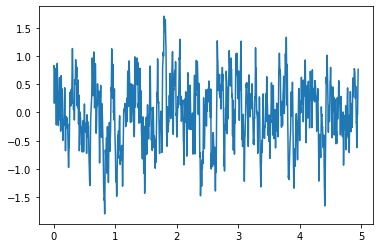

In [218]:
time = np.linspace(0,delt_t*N1,N1)
plt.plot(time,f_t1)
plt.show()

Step 3: Generate 24 more samples and visualize all the samples

In [245]:
ff_t = np.zeros((25,N1))

p = 0
while p < 24:
    
    Matrix_Phi = np.zeros(N)              # Renew matrix_Phi in each time series

    i = 0
    while i < N:
        Matrix_Phi[i] = np.random.uniform(0,1) * 2 * np.pi
        i += 1
    
    f_t = np.zeros(N1)
    j = 0
    while j < N1:
        k = 0
        while k < N:
            f_t[j] += ((2*Sx(delt_w*k,alpha,wg,kesi)*delt_w)**0.5)*np.cos(delt_w*k*j*delt_t+Matrix_Phi[k])
            k += 1
        f_t[j] = f_t[j] * (2**0.5)                           
        j += 1
    ff_t[p] = f_t                          # results are stored in ff_t matrix
    p += 1
    
ff_t[24] = f_t1

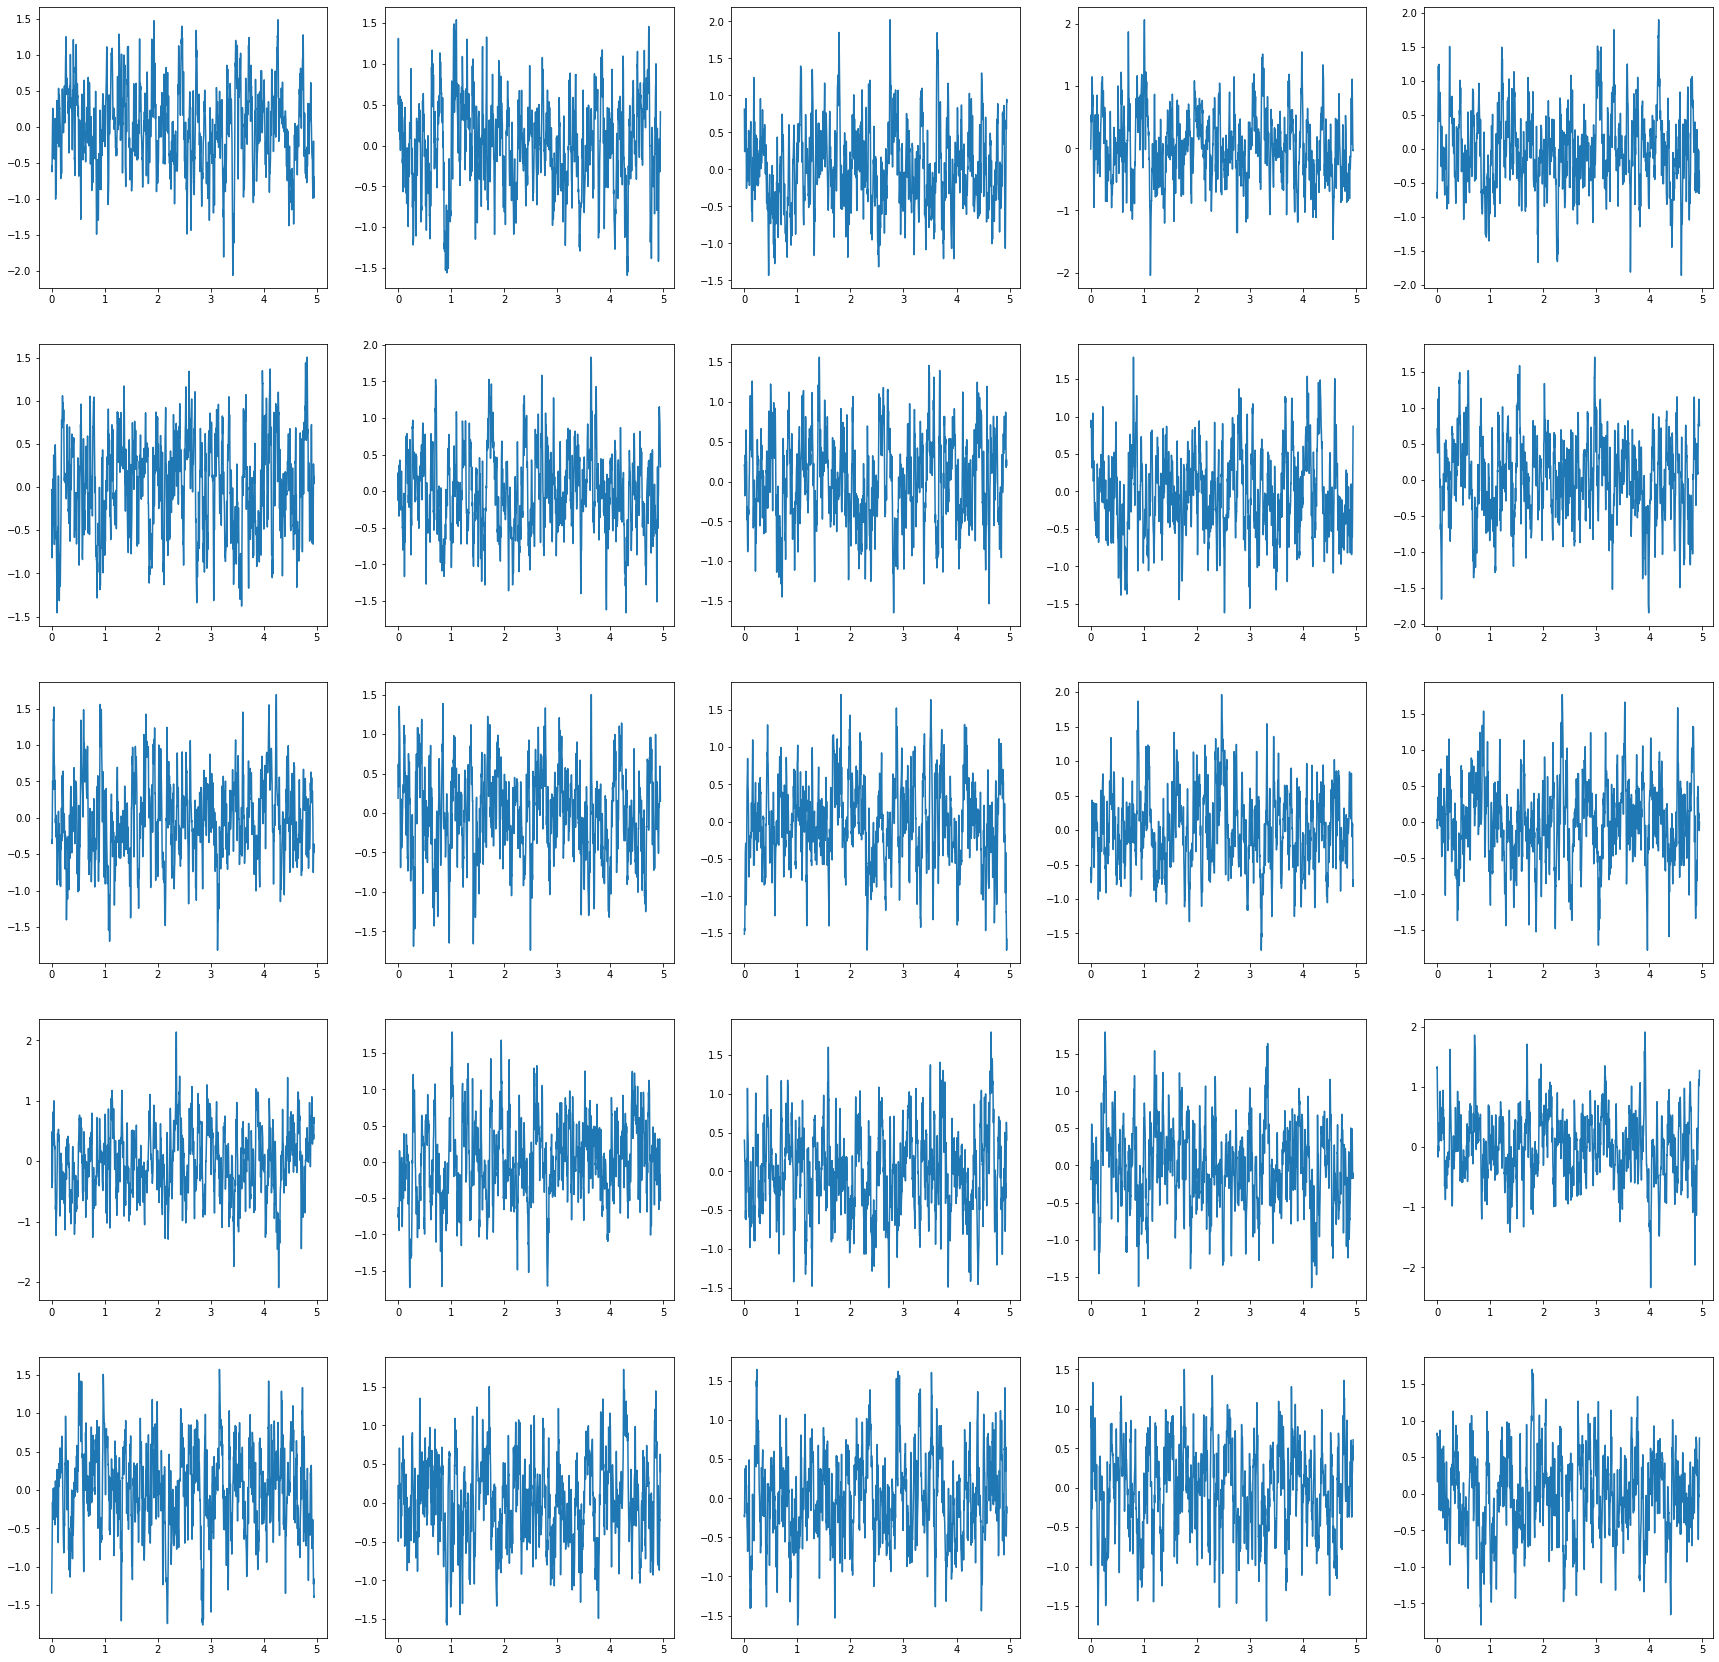

In [246]:
f, axis = plt.subplots(5, 5)

q = 0
while q < 5:
    n = 0
    while n < 5:
        axis[q, n].plot(time, ff_t[q*5+n])
        n += 1
    q += 1

f.set_figheight(30)
f.set_figwidth(30)

Calculate power spectral density function by using FFT

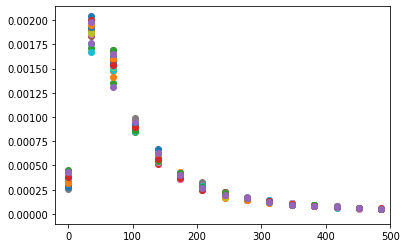

In [247]:
import warnings
warnings.filterwarnings("ignore")

h = 0
while h < np.shape(ff_t)[0]:
    f, Pxx_den = signal.welch(ff_t[h], delt_w*7000)                 # choose a correct value delt_w here.
    plt.scatter(f, Pxx_den)
    h += 1
plt.xlim((-20, 500)) 
plt.show()

Finally, export time series numpy array ff_t into csv file